<a href="https://colab.research.google.com/github/Amith2001/machine-learning/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [252]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler 

from keras.models import Sequential 

from keras.layers import Dense, LSTM, Dropout
from google.colab import files
files.upload()
testData=pd.read_csv('WIPRO.csv')
tesla['Close']=pd.to_numeric(tesla.Close,errors='coerce')
tesla=tesla.dropna()
trainData=tesla.iloc[:,4:5].values
sc=MinMaxScaler(feature_range=(0,1))
trainData=sc.fit_transform(trainData)
x_train=[]
y_train=[]
for i in range(60,1149):
  x_train.append(trainData[i-60:i,0])
  y_train.append(trainData[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
model=Sequential()

model.add(LSTM(units=100,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100,return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')

Saving WIPRO.csv to WIPRO (12).csv


In [253]:
hist=model.fit(x_train,y_train,epochs=20,batch_size=32,verbose=2)


Epoch 1/20
35/35 - 26s - loss: 0.0412 - 26s/epoch - 732ms/step
Epoch 2/20
35/35 - 9s - loss: 0.0089 - 9s/epoch - 262ms/step
Epoch 3/20
35/35 - 7s - loss: 0.0048 - 7s/epoch - 203ms/step
Epoch 4/20
35/35 - 7s - loss: 0.0045 - 7s/epoch - 208ms/step
Epoch 5/20
35/35 - 7s - loss: 0.0047 - 7s/epoch - 209ms/step
Epoch 6/20
35/35 - 7s - loss: 0.0041 - 7s/epoch - 199ms/step
Epoch 7/20
35/35 - 7s - loss: 0.0039 - 7s/epoch - 200ms/step
Epoch 8/20
35/35 - 7s - loss: 0.0053 - 7s/epoch - 201ms/step
Epoch 9/20
35/35 - 7s - loss: 0.0050 - 7s/epoch - 203ms/step
Epoch 10/20
35/35 - 7s - loss: 0.0037 - 7s/epoch - 206ms/step
Epoch 11/20
35/35 - 7s - loss: 0.0035 - 7s/epoch - 213ms/step
Epoch 12/20
35/35 - 7s - loss: 0.0035 - 7s/epoch - 212ms/step
Epoch 13/20
35/35 - 8s - loss: 0.0038 - 8s/epoch - 231ms/step
Epoch 14/20
35/35 - 8s - loss: 0.0034 - 8s/epoch - 232ms/step
Epoch 15/20
35/35 - 7s - loss: 0.0030 - 7s/epoch - 210ms/step
Epoch 16/20
35/35 - 7s - loss: 0.0042 - 7s/epoch - 203ms/step
Epoch 17/20
35/

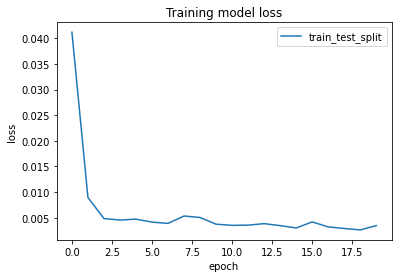

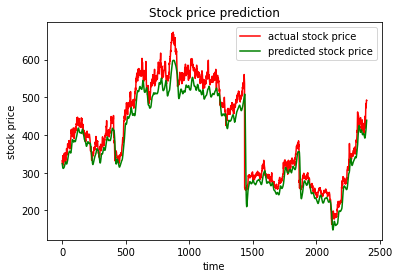


 accuracy = 98.16544389034182


In [255]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_test_split'])
plt.show()
testData=pd.read_csv('WIPRO.csv')
testData['Close']=pd.to_numeric(testData.Close,errors='coerce')
testData=testData.dropna()
testData=testData.iloc[:,4:5]
y_test=testData.iloc[60:,0,].values
#input array for the model
inputClosing=testData.iloc[:,0:].values
inputClosing_scaled=sc.transform(inputClosing)
inputClosing_scaled.shape
x_test=[]
length=len(testData)
timestep=60
for i in range(timestep,length):
  x_test.append(inputClosing_scaled[i-timestep:i,0])
x_test=np.array(x_test)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape
x_tst=x_test[-1]
y_pred=model.predict(x_test)
y=y_pred[0:60]
y_prd=np.reshape(y,60)
score=0
for i in x_tst:
  for j in y_prd:
    score=(score+(x_tst/y_prd))      
accuracy=(sum(score)/(sum(y_prd)+(sum(x_tst)))/70)
predicted_price=sc.inverse_transform(y_pred)
plt.plot(y_test,color='red',label='actual stock price')
plt.plot(predicted_price,color='green',label='predicted stock price')
plt.title('Stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()
print('\n accuracy =',accuracy)